In [122]:
import matplotlib.pyplot as plt
import numpy as np
import time
from numba import jit



In [6]:
Z = [[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]];


In [8]:
def calcul_nb_voisins(Z):
    forme = len(Z), len(Z[0])
    N = [[0, ] * (forme[0]) for i in range(forme[1])]
    for x in range(1, forme[0] - 1):
        for y in range(1, forme[1] - 1):
            N[x][y] = Z[x-1][y-1]+Z[x][y-1]+Z[x+1][y-1] \
                    + Z[x-1][y] + 0 +Z[x+1][y] \
                    + Z[x-1][y+1]+Z[x][y+1]+Z[x+1][y+1]
    return N


In [9]:
"Nous donnonscomme argument notre matrice du jeu de la vie à un tour n"
def iteration_jeu(Z):
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z) 
    
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            "condition de mort et de naissance"
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z
"Nous récupérons notre matrice du jeu de la vie au tour n+1"

'Nous récupérons notre matrice du jeu de la vie au tour n+1'

In [101]:
def iteration_jeu_nb(Z,n):
    
    affichage=(n//5)+1
    Z2=np.asarray(list(Z))
    plt.subplot(affichage,5,1)
    plt.imshow(np.asarray(Z2))

    for i in range(2,n+2):
        Z=iteration_jeu(Z2)
        plt.subplot(affichage,5,i)
        plt.imshow(Z2)
    return Z2

In [119]:

def iteration_jeu_nb_opti(Z,n):
    
    affichage=(n//5)+1
    Z2=np.asarray(list(Z))
    plt.subplot(affichage,5,1)
    plt.imshow(np.asarray(Z2))

    for i in range(2,n+2):
        Z=iteration_jeu(Z2)
        plt.subplot(affichage,5,i)
        plt.imshow(Z2)
    return Z2

On crée une fonvtion nous permettant de calculer le nombre d'itération voulu pour une matrice de départ Z. 

In [149]:
import matplotlib.pyplot as plt
import numpy as np

def iteration_jeu_nb_sans_affichage(Z,n):
    
    affichage=(n//5)+1
    Z2=np.asarray(list(Z))
   

    for i in range(2,n+2):
        Z=iteration_jeu(Z2)
       
    return Z2

In [ ]:
import ipywidgets as ip

def iteration_jeu_Z_huge(n):
    
    affichage=(n//2)+1
    Z2=np.asarray(list(Z_huge))


    for i in range(2,n+2):
        iteration_jeu(Z2)
     
    plt.imshow(Z2)
    plt.show()


0.05039395888646444

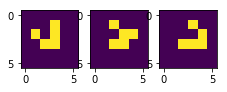

In [118]:
start = time.time()
iteration_jeu_nb(Z,2)
end = time.time()
t0.append(end - start)


sum(t0)/len(t0)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

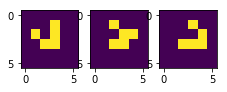

In [128]:

iteration_jeu_nb_opti(Z,2)


In [135]:
@jit
def iteration_jeu_nb_sans_affichage_jit(Z,n):
    
    affichage=(n//5)+1
    Z2=np.asarray(list(Z))


    for i in range(2,n+2):
        Z=iteration_jeu(Z2)
        
    return Z2

In [272]:
t0=[]
t1 = []
t2 = []
n=70

for i in range(1,n+1):
    
    
    @jit
    def iteration_jeu_nb_sans_affichage_jit(Z,n):

        affichage=(n//5)+1
        Z2=np.asarray(list(Z))


        for i in range(2,n+2):
            Z=iteration_jeu(Z2)

        return Z2


    start = time.time()
    iteration_jeu_nb_sans_affichage_jit(Z,i)
    end = time.time()
    t0.append(end - start)
   
    
    # COMPILATION NON INCLUSE, EXECUTER DEPUIS LE CACHE
    start = time.time()
    iteration_jeu_nb_sans_affichage_jit(Z,i)
    end = time.time()
    t1.append(end - start)
   
    # VANILLA PYTHON
    start = time.time()
    iteration_jeu_nb_sans_affichage(Z,i)
    end = time.time()
    t2.append(end - start)
    



t1 = np.array(t1)
t2 = np.array(t2)

print("Améliorations en pourcentage par rapport au code vanilla")

print((t1 - t2) / t2 * 100)



Améliorations en pourcentage par rapport au code vanilla
[            nan             nan             nan             nan
             nan             nan             nan -1.00000000e+02
             nan -1.00000000e+02 -1.00000000e+02             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
 -1.00000000e+02             nan             nan             nan
             nan -1.00000000e+02 -7.15392870e-02 -1.00000000e+02
             nan -1.19274809e-02             nan             inf
             nan             nan             inf             nan
             nan             nan             nan             nan
             nan             inf             nan             nan
             nan             nan             nan             nan
             nan             nan             nan             nan
             nan             nan -1.00000000e+02 -1.00000000e+02
             inf             inf 

C:\Users\julien\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\julien\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide
